## Matrix and Linear Algebra Computation Project
## Rodgers Otieno Rume
## SDS6/44274/2023

## 1. Load the dataset


In [184]:
import numpy as np ##Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
Creditcard = pd.read_csv("C:/Users/HP/Desktop/University of Nairobi/Matrix & Linear Algebra Computation/creditcard1.csv")
Creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4560,1.108783,0.055038,1.067820,1.762378,-0.479110,0.333237,-0.467694,0.090628,2.155096,...,-0.231608,-0.061360,-0.064749,0.049254,0.588488,-0.297483,0.045084,0.017438,15.00,0
4996,4561,-0.322937,0.914229,2.571751,3.314611,-0.487059,0.701042,-0.240184,0.331519,0.805293,...,0.065633,0.566488,-0.060821,0.327924,-0.561712,0.306355,0.165721,0.148775,15.18,0
4997,4561,-0.594534,0.603273,1.681460,0.331167,0.344769,1.017832,0.597708,-1.541198,0.189042,...,0.177583,-0.468072,-0.109660,-0.362803,-0.456087,-0.470498,-0.612240,-0.511449,56.15,0
4998,4562,-1.510867,1.725945,0.990544,-0.463845,-0.589761,-0.744447,-0.073032,0.800712,0.699399,...,-0.212503,-0.366284,0.047824,0.517534,-0.160048,0.230429,0.135888,0.101896,4.00,0


# 2. Describe the Dataset

In [185]:
##A quick description of the dataset
print('the shape of the data is:', Creditcard.shape) ##A quick description of the dataset
Creditcard.head()
Creditcard.describe()

the shape of the data is: (5000, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2115.711400,-0.231403,0.255613,0.819420,0.017935,-0.001525,0.176218,0.042119,-0.033597,0.235148,...,-0.022922,-0.150092,-0.041217,0.038266,0.096778,-0.048575,0.038384,0.004938,63.801066,0.00060
std,1310.428648,1.373311,1.161780,1.005793,1.421640,1.193638,1.365726,1.056656,1.198995,0.981256,...,0.795750,0.631866,0.369340,0.619742,0.402285,0.492913,0.334735,0.244331,197.469524,0.02449
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.512377,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.00000
25%,965.750000,-0.979465,-0.326502,0.277256,-0.915679,-0.603509,-0.695906,-0.472985,-0.191954,-0.360666,...,-0.242936,-0.587584,-0.190612,-0.341877,-0.138185,-0.416753,-0.042299,-0.016441,3.797500,0.00000
50%,2072.500000,-0.406456,0.325332,0.846885,0.064772,-0.083521,-0.167077,0.064890,0.038273,0.232701,...,-0.092730,-0.173583,-0.048373,0.103362,0.116338,-0.089753,0.021399,0.019665,15.155000,0.00000
75%,3243.500000,1.126137,0.902415,1.455559,0.990035,0.433778,0.580896,0.584885,0.336785,0.756522,...,0.074324,0.282913,0.085965,0.445422,0.357152,0.248768,0.174045,0.082230,57.160000,0.00000
max,4563.000000,1.685314,6.224859,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,15.631453,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.157934,7712.430000,1.00000


In [186]:
Creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [187]:
Creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4995,4560,1.108783,0.055038,1.067820,1.762378,-0.479110,0.333237,-0.467694,0.090628,2.155096,...,-0.231608,-0.061360,-0.064749,0.049254,0.588488,-0.297483,0.045084,0.017438,15.00,0
4996,4561,-0.322937,0.914229,2.571751,3.314611,-0.487059,0.701042,-0.240184,0.331519,0.805293,...,0.065633,0.566488,-0.060821,0.327924,-0.561712,0.306355,0.165721,0.148775,15.18,0
4997,4561,-0.594534,0.603273,1.681460,0.331167,0.344769,1.017832,0.597708,-1.541198,0.189042,...,0.177583,-0.468072,-0.109660,-0.362803,-0.456087,-0.470498,-0.612240,-0.511449,56.15,0
4998,4562,-1.510867,1.725945,0.990544,-0.463845,-0.589761,-0.744447,-0.073032,0.800712,0.699399,...,-0.212503,-0.366284,0.047824,0.517534,-0.160048,0.230429,0.135888,0.101896,4.00,0
4999,4563,-2.071050,2.153658,0.529213,-0.479327,-0.930649,-0.827955,-0.462825,1.242180,0.723136,...,-0.198593,-0.401251,0.101922,0.512960,-0.087544,0.236889,0.113365,0.101352,1.00,0


In [188]:
Creditcard.isna().sum()#Checking for null values n the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

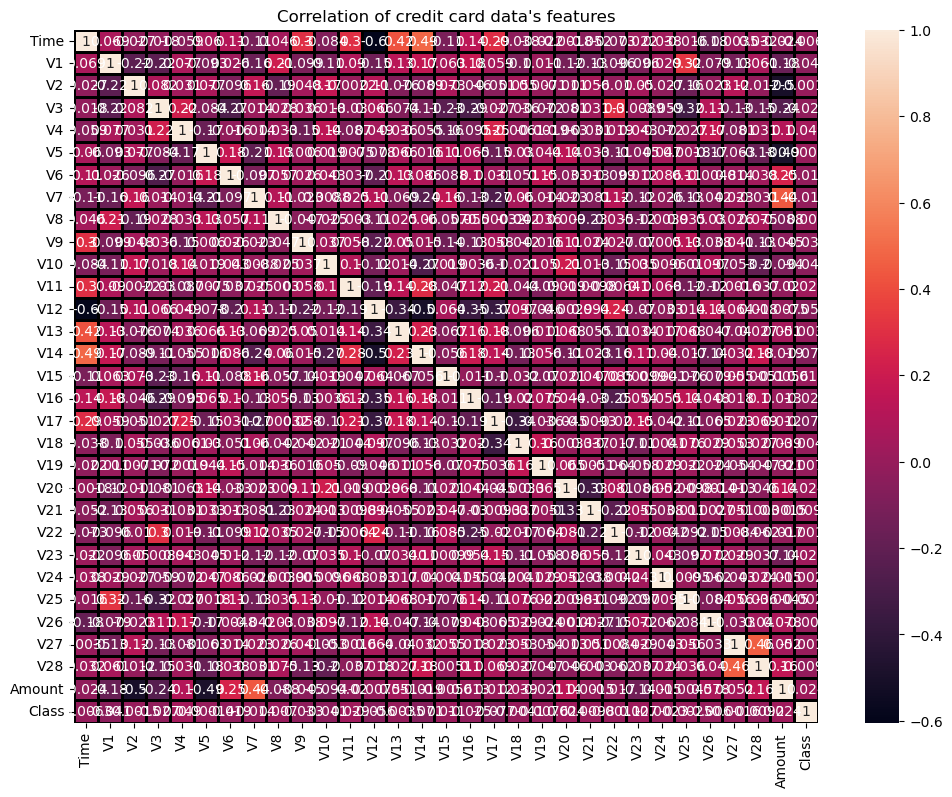

In [189]:
#finding the correlation between the variables in the dataset
data_correlate = Creditcard.corr()
plt.figure(figsize = (12, 9))
sns.heatmap(data_correlate, linecolor = 'black', linewidth = 1, annot = True)
plt.title('Correlation of credit card data\'s features')
plt.show()

# 3. Spectral Clustering

### 3.1 Compute the Graph Laplacian

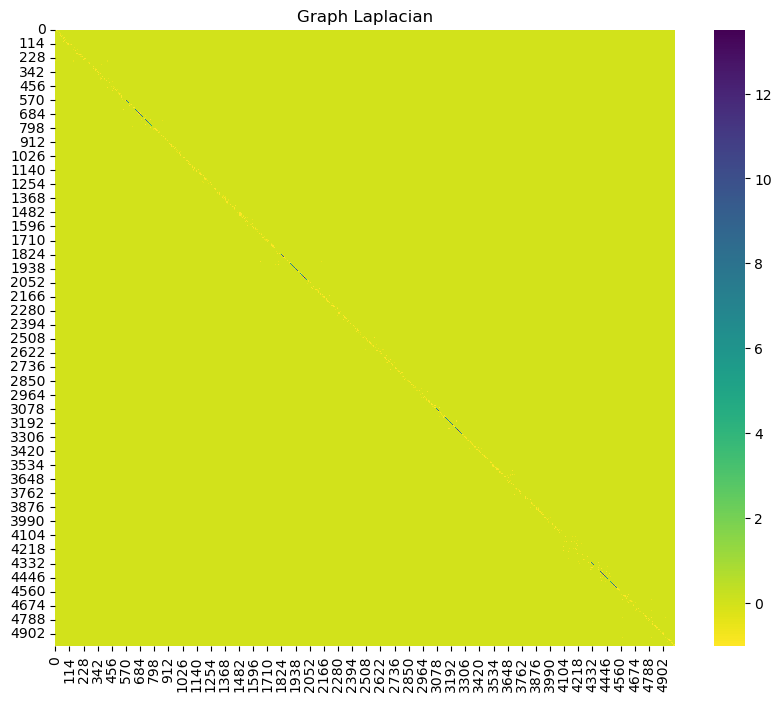

In [190]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df=Creditcard, nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

### 3.2 Compute the eigenvalues and eigenvectors of the graph Laplacian.

In [182]:
from scipy import linalg
eigenvals, eigenvcts = linalg.eig(graph_laplacian)
eigenvals, eigenvcts 

(array([-3.74917111e-16+0.j,  1.69747941e-03+0.j,  2.88543424e-03+0.j, ...,
         9.00000000e+00+0.j,  9.00000000e+00+0.j,  9.00000000e+00+0.j]),
 array([[ 1.41421356e-02, -8.56247790e-03,  1.33684446e-02, ...,
          1.09669678e-14,  1.38459476e-14,  5.25505579e-15],
        [ 1.41421356e-02, -1.00240810e-02, -2.54585322e-02, ...,
         -8.59528684e-15,  6.51782384e-15, -1.58588517e-14],
        [ 1.41421356e-02, -6.57187242e-03,  1.34672280e-02, ...,
         -1.25859014e-14, -1.41956817e-14, -4.58706306e-15],
        ...,
        [ 1.41421356e-02,  1.87016538e-02,  5.16878287e-04, ...,
          2.32981197e-16,  9.05216679e-14, -1.64009611e-14],
        [ 1.41421356e-02,  2.10060498e-02,  2.53508395e-04, ...,
          1.47405399e-14,  2.19491168e-14,  8.53831095e-15],
        [ 1.41421356e-02,  2.08283501e-02,  2.28391720e-04, ...,
          2.62211186e-14, -2.01390011e-13,  5.99402597e-14]]))

In [191]:
#Change the complex values into real values 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)
eigenvals, eigenvcts 

(array([-1.50270421e-16,  1.41135896e-03,  3.12739026e-03, ...,
         9.00000000e+00,  9.00000000e+00,  9.00000000e+00]),
 array([[ 1.41421356e-02, -1.55194202e-02, -1.46642475e-02, ...,
          1.00299605e-14, -3.25835204e-16, -2.49921819e-14],
        [ 1.41421356e-02, -1.65825736e-02, -1.68808375e-02, ...,
          1.77268391e-14,  9.22646753e-15, -2.55315088e-15],
        [ 1.41421356e-02, -1.37828896e-02, -1.14331977e-02, ...,
         -1.44952961e-14, -9.86642357e-15,  3.35867083e-15],
        ...,
        [ 1.41421356e-02,  1.93321403e-02, -1.53219839e-02, ...,
         -3.00854399e-16, -4.42379191e-16, -3.60173112e-16],
        [ 1.41421356e-02,  1.93378964e-02, -1.53316441e-02, ...,
          9.03427692e-16,  1.71223552e-15,  1.17430325e-15],
        [ 1.41421356e-02,  1.93381306e-02, -1.53320549e-02, ...,
         -7.78712880e-17, -1.78570645e-16, -4.57546363e-16]]))

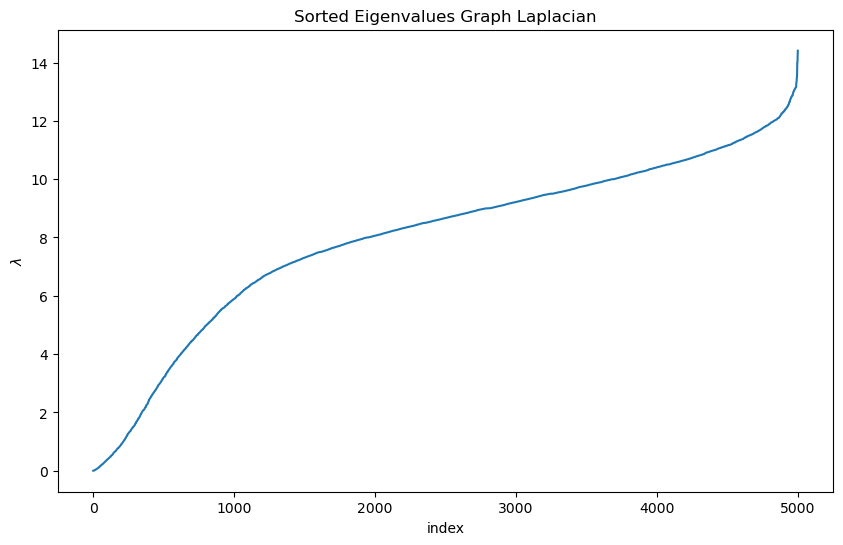

In [192]:
##Plot the eigen values
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

### 3.2 Find the Smallest Eigen Value and the Corresponding Eigen Vector

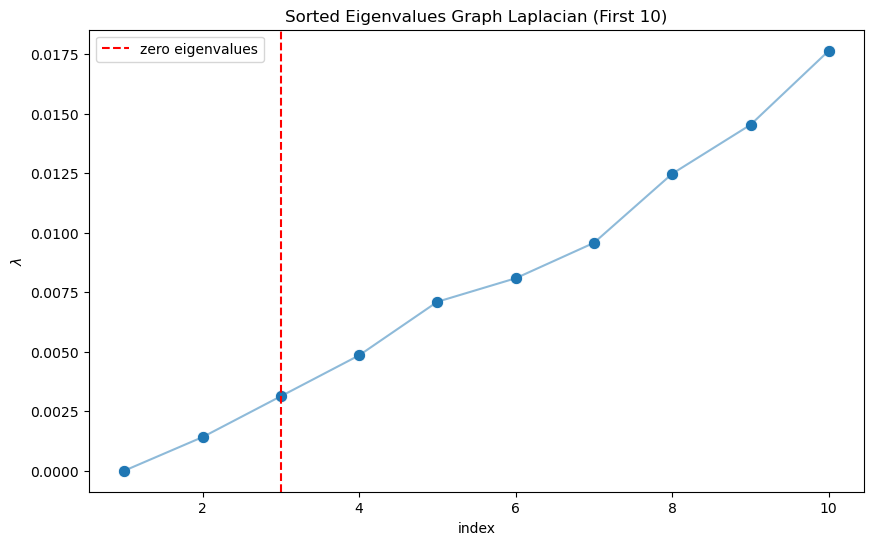

In [193]:
index_lim = 10
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=3, color='r', label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [194]:
Least_eigenvals_index = np.argwhere(abs(eigenvals) <0.003129) #the first 175 eigen values are zero, we generate their corresponding eigen vectors
eigenvals[Least_eigenvals_index]
proj_df = pd.DataFrame(eigenvcts[:, Least_eigenvals_index.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
proj_df.head()

,v_0,v_1,v_2
0,0.014142,-0.015519,-0.014664
1,0.014142,-0.016583,-0.016881
2,0.014142,-0.013783,-0.011433
3,0.014142,-0.015681,-0.014990
4,0.014142,-0.016163,-0.015989


### 3.2 Visualize the new Eigen Vector

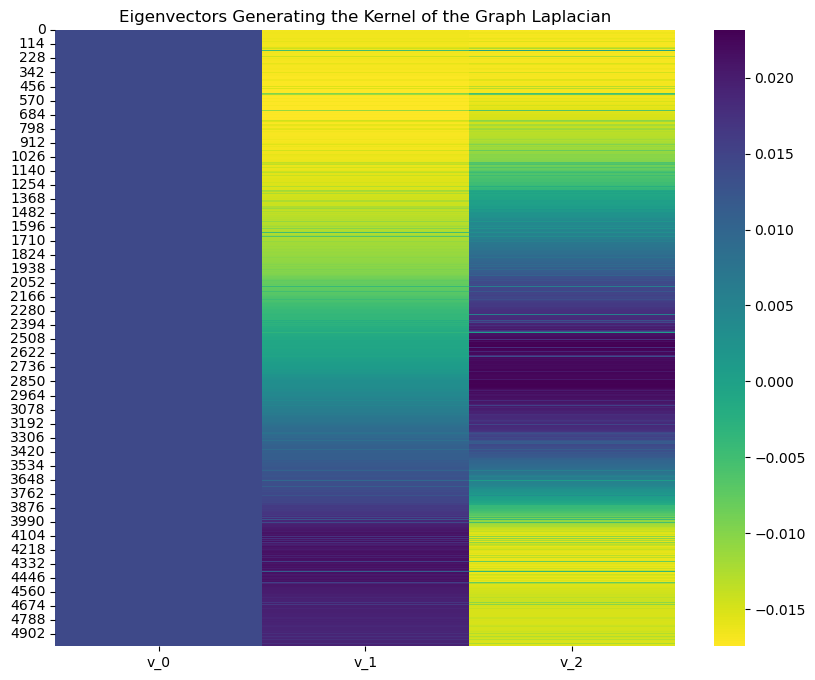

In [195]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(proj_df, ax=ax, cmap='viridis_r')
ax.set(title='Eigenvectors Generating the Kernel of the Graph Laplacian');

C:\Users\HP\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: F

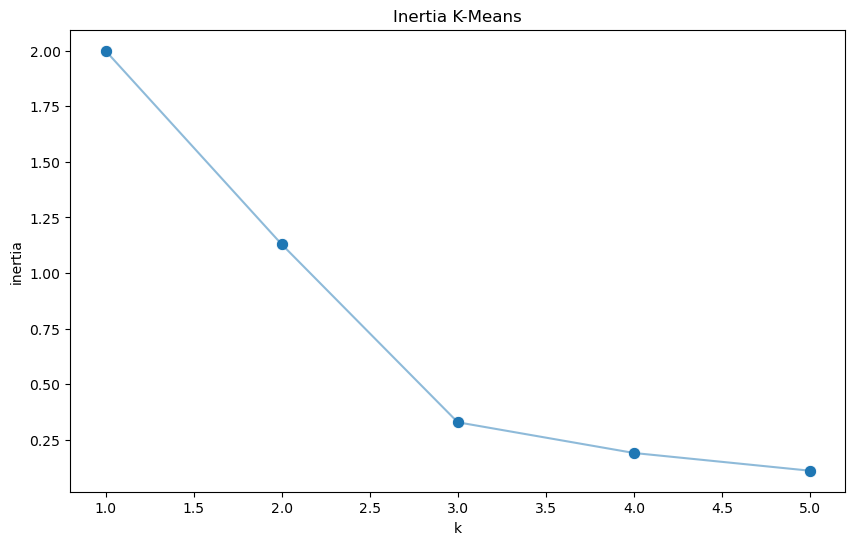

In [196]:
##Find the Optimal number of clusters
from sklearn.cluster import KMeans
inertias = []
k_candidates = range(1, 6)
for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(proj_df)
    inertias.append(k_means.inertia_)
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');



In [ ]:
##The number of clusters as shown in the graph is 2

In [197]:
def run_k_means(df, n_clusters):
    """K-means clustering."""
    k_means = KMeans(random_state=25, n_clusters=n_clusters)
    k_means.fit(df)
    cluster = k_means.predict(df)
    return cluster

cluster = run_k_means(proj_df, n_clusters=3)
cluster

C:\Users\HP\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 2, 2, 2])

In [198]:
Creditcard['cluster'] = ['c_' + str(c) for c in cluster]
Creditcard['cluster'] 

0       c_0
1       c_0
2       c_0
3       c_0
4       c_0
       ... 
4995    c_2
4996    c_2
4997    c_2
4998    c_2
4999    c_2
Name: cluster, Length: 5000, dtype: object

### 3.3 Visualize the data to observe the outliers detected

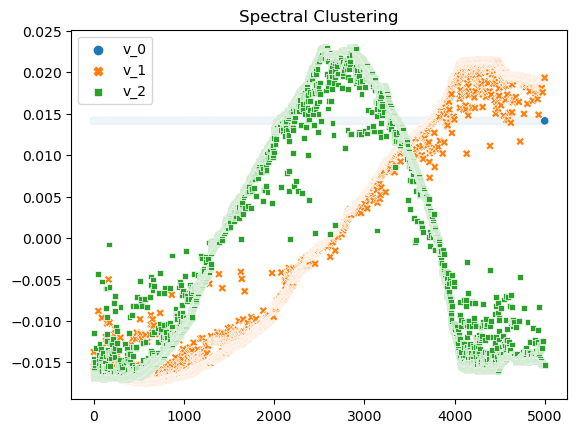

In [200]:
data_df['cluster'] = ['c_' + str(c) for c in cluster]
fig, ax = plt.subplots()
sns.scatterplot(data=proj_df,  ax=ax)
ax.set(title='Spectral Clustering');